In [1]:
from keras.layers import Activation, Conv2D, BatchNormalization, Dense
from keras.layers import Dropout, Flatten, Input, MaxPooling2D, ZeroPadding2D
from keras import Model 

Using TensorFlow backend.


In [2]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.25)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options)) 

In [3]:
IMSIZE = 227
input_layer = Input([IMSIZE,IMSIZE,3])
x = input_layer
x = Conv2D(96,[11,11],strides = [4,4],activation = 'relu')(x)
x = MaxPooling2D([3,3],strides = [2,2])(x)
x = Conv2D(256,[5,5],padding = 'same',activation = 'relu')(x)
x = MaxPooling2D([3,3],strides = [2,2])(x)
x = Conv2D(384,[3,3],padding = 'same',activation = 'relu')(x)
x = Conv2D(384,[5,5],padding = 'same',activation = 'relu')(x)
x = Conv2D(256,[5,5],padding = 'same',activation = 'relu')(x)
x = MaxPooling2D([3,3],strides = [2,2])(x)
x = Flatten()(x)
x = Dense(4096,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(2,activation = 'softmax')(x)
output_layer = x
model = Model(input_layer,output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       3686

In [4]:
#数据生成器
from keras.preprocessing.image import ImageDataGenerator
IMSIZE = 227
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    '/mnt/data/ChineseStyle/train',
    target_size = (IMSIZE,IMSIZE),
    batch_size = 128,
    class_mode = 'categorical')
validation_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    '/mnt/data/ChineseStyle/test',
    target_size = (IMSIZE,IMSIZE),
    batch_size = 128,
    class_mode = 'categorical')

Found 8000 images belonging to 2 classes.
Found 5526 images belonging to 2 classes.


<Figure size 432x288 with 0 Axes>

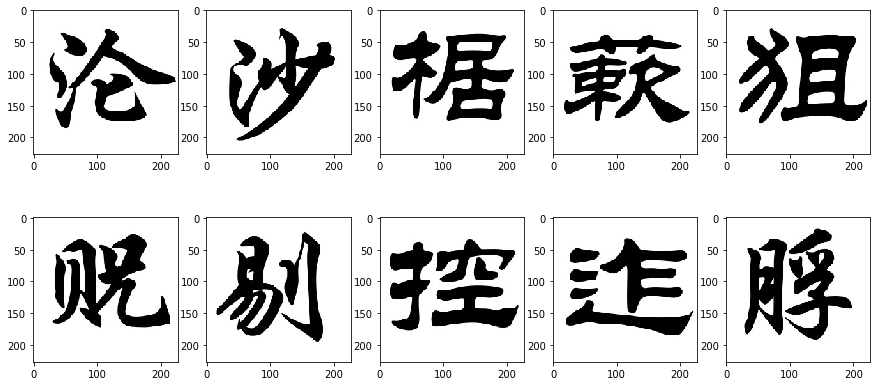

In [5]:
from matplotlib import pyplot as plt
plt.figure()
fig,ax = plt.subplots(2,5)
fig.set_figheight(7)
fig.set_figwidth(15)
ax = ax.flatten()
X,Y = next(validation_generator)
for i in range(10):ax[i].imshow(X[i,:,:,:])

In [6]:
from keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(lr = 0.001),metrics = ['accuracy'])
model.fit_generator(train_generator,epochs = 10,validation_data = validation_generator)

Epoch 1/10
63/63 [==============================] - 156s 2s/step - loss: 1.9691 - accuracy: 0.6630 - val_loss: 0.0355 - val_accuracy: 0.9674
Epoch 2/10
63/63 [==============================] - 37s 585ms/step - loss: 0.0588 - accuracy: 0.9826 - val_loss: 0.0926 - val_accuracy: 0.9915
Epoch 3/10
63/63 [==============================] - 38s 597ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0302 - val_accuracy: 0.9937
Epoch 4/10
63/63 [==============================] - 37s 585ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 4.4422e-04 - val_accuracy: 0.9971
Epoch 5/10
63/63 [==============================] - 36s 569ms/step - loss: 0.0149 - accuracy: 0.9950 - val_loss: 8.3562e-05 - val_accuracy: 0.9971
Epoch 6/10
63/63 [==============================] - 37s 583ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 1.8756e-05 - val_accuracy: 0.9964
Epoch 7/10
63/63 [==============================] - 37s 584ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 2.3200e-04 - val_ac